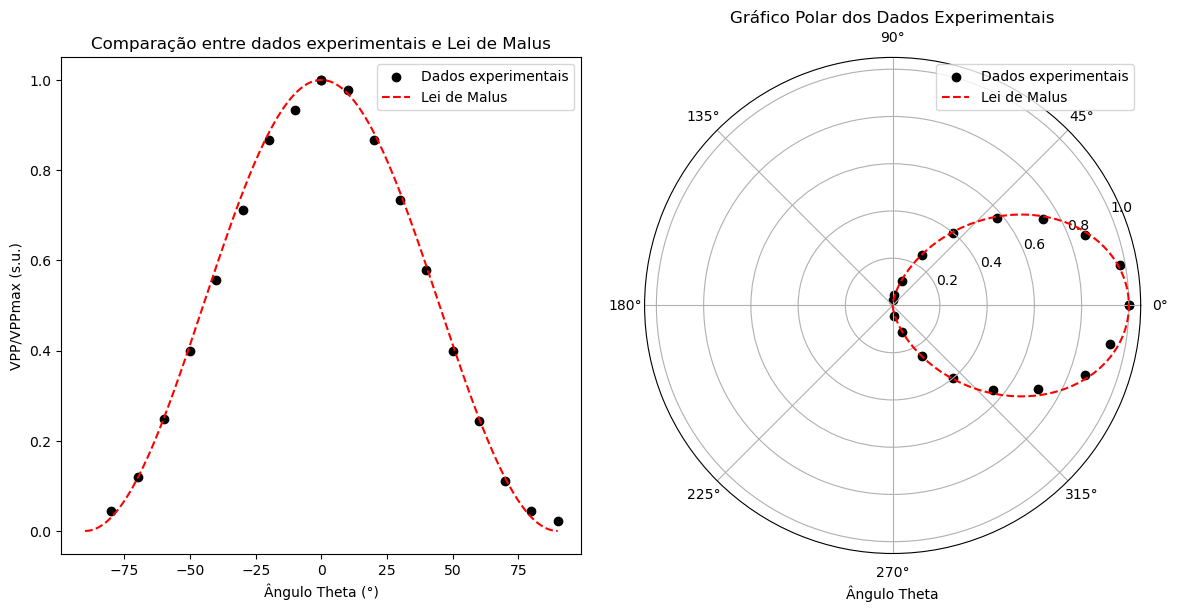

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dois ficheiros .csv
data1 = pd.read_csv('/Users/emanuelmiranda/Desktop/Exp9/Dados/1.csv', sep=';')
data2 = pd.read_csv('/Users/emanuelmiranda/Desktop/Exp9/Dados/2.csv', sep=';')

# Concatenar os dois conjuntos de dados
data_combined = pd.concat([data1, data2])

# Converter a coluna 'Voltagem' de string com vírgula para números com ponto
data_combined['Voltagem'] = data_combined['Voltagem'].str.replace(',', '.').astype(float)

# Extrair as colunas necessárias
theta = data_combined['Ângulo theta']
voltagem = data_combined['Voltagem']

# Normalizar a voltagem medida para que a voltagem máxima seja 1 (aproximadamente equivalente a P0)
voltagem_normalizada = voltagem / 9

# Criar uma lista de ângulos entre -90º e 90º
theta_list = np.linspace(-90, 90, 180)  # 180 pontos de -90º a 90º

# Calcular a potência teórica de acordo com a Lei de Malus (usando o valor de theta em graus)
potencia_teorica = np.cos(np.radians(theta_list))**2

# Criar subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico normal
axs[0].scatter(theta, voltagem_normalizada, marker='o', color='black', label='Dados experimentais')
axs[0].plot(theta_list, potencia_teorica, color='r', linestyle='--', label='Lei de Malus')
axs[0].set_xlabel('Ângulo Theta (°)')
axs[0].set_ylabel('VPP/VPPmax (s.u.)')
axs[0].set_title('Comparação entre dados experimentais e Lei de Malus')
axs[0].legend()

# Gráfico polar
ax_polar = plt.subplot(122, projection='polar')  # Criar gráfico polar como subplot

# Converter ângulos para radianos
theta_rad = np.radians(theta)

# Plotar os dados experimentais no gráfico polar
ax_polar.scatter(theta_rad, voltagem_normalizada, marker='o', color='black', label='Dados experimentais')

# Plotar a linha teórica no gráfico polar
theta_list_rad = np.radians(theta_list)
ax_polar.plot(theta_list_rad, potencia_teorica, color='r', linestyle='--', label='Lei de Malus')

# Ajustar os ângulos no gráfico polar
ax_polar.set_xlabel('Ângulo Theta')
ax_polar.set_title('Gráfico Polar dos Dados Experimentais')

# Exibir a legenda
ax_polar.legend()

# Ajuste do layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

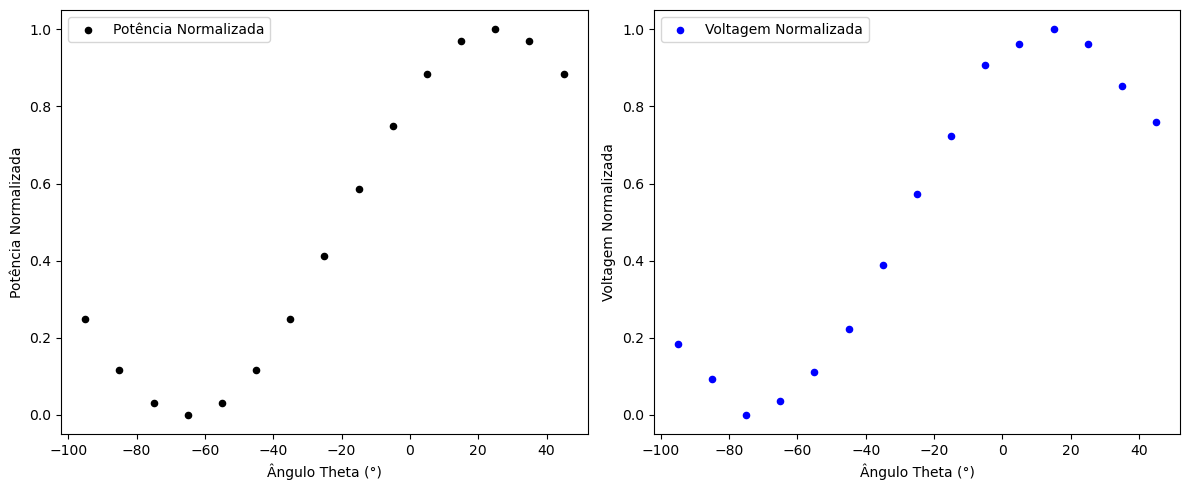

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o ficheiro .csv
data = pd.read_csv('/Users/emanuelmiranda/Desktop/Exp9/Dados/3.csv', sep=';')  # Verificar se o separador é ';'

# Extrair as colunas necessárias
theta = data['Ângulo theta']
voltagem = data['Voltagem']

# Definir os parâmetros
beta = 25  # Ângulo beta em graus
P0 = 9  # Valor máximo de voltagem

# Converter ângulos para radianos
theta_rad = np.radians(theta)
beta_rad = np.radians(beta)

# Calcular a potência teórica (P) usando a equação fornecida
P_teorica = (np.cos(theta_rad)**2 + np.cos(2 * beta_rad - theta_rad)**2)

# Normalizar P_teorica
P_normalizado = (P_teorica - np.min(P_teorica)) / (np.max(P_teorica) - np.min(P_teorica))

# Normalizar Voltagem
V_normalizado = (voltagem - np.min(voltagem)) / (np.max(voltagem) - np.min(voltagem))

# Criar os subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Primeiro subplot: Ângulo Theta em função da Potência Normalizada
ax1.scatter(theta, P_normalizado, marker='o', s=20, color='black', label='Potência Normalizada')
ax1.set_xlabel('Ângulo Theta (°)')
ax1.set_ylabel('Potência Normalizada')
ax1.legend()

# Segundo subplot: Ângulo Theta em função da Voltagem Normalizada
ax2.scatter(theta, V_normalizado, marker='o', s=20, color='blue', label='Voltagem Normalizada')
ax2.set_xlabel('Ângulo Theta (°)')
ax2.set_ylabel('Voltagem Normalizada')
ax2.legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

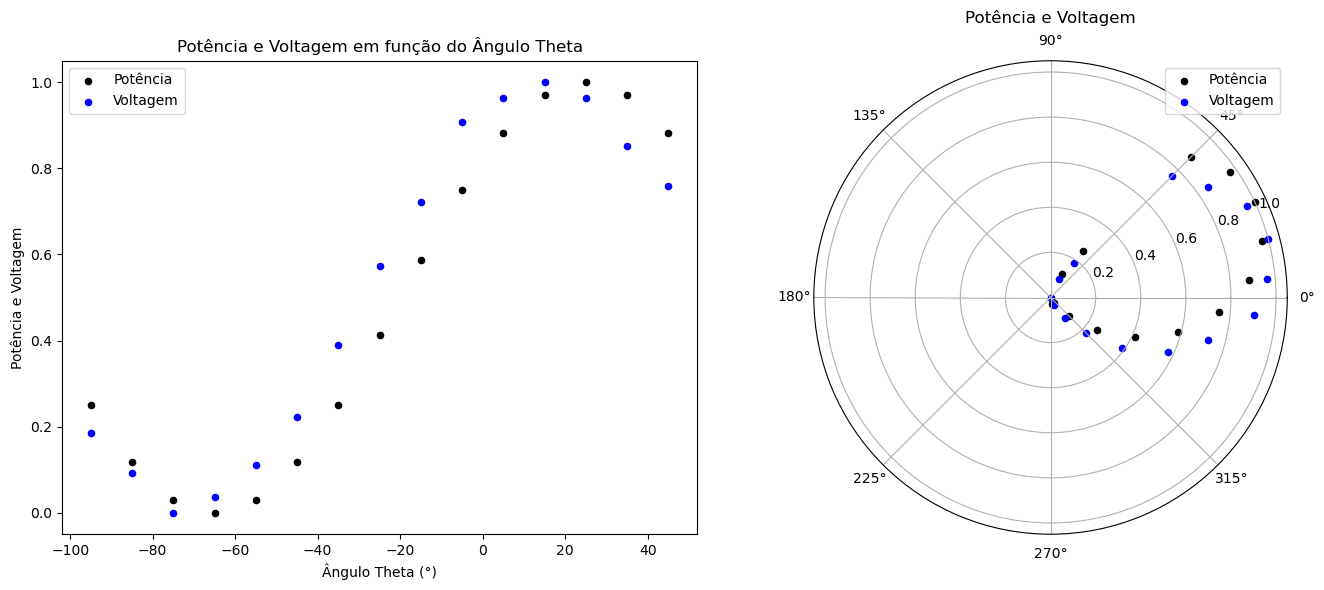

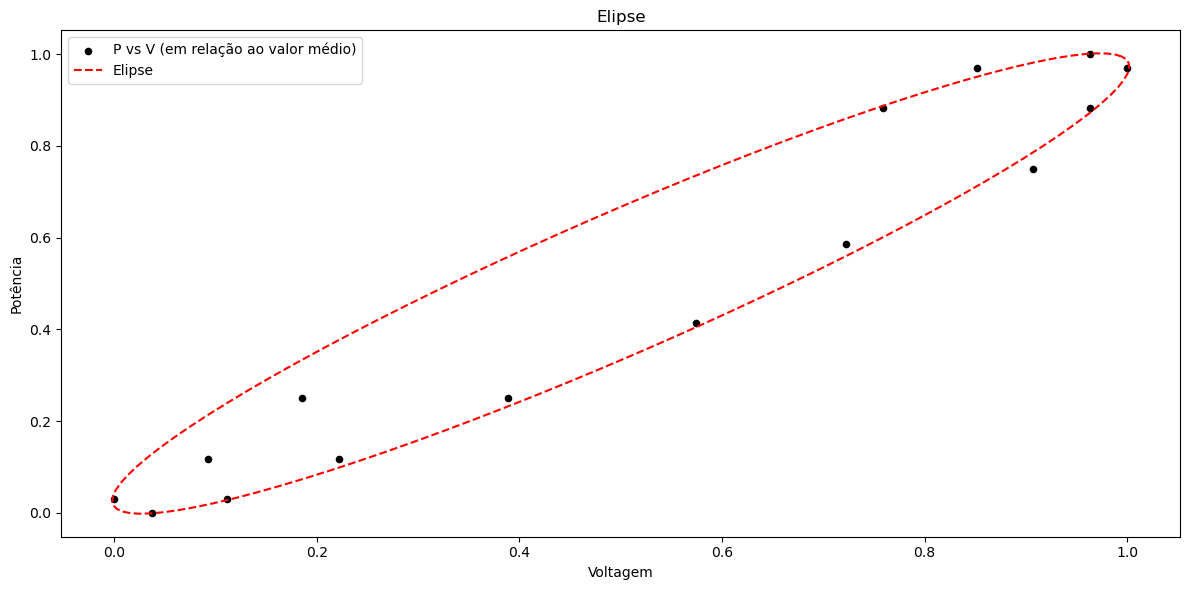

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o ficheiro .csv
data = pd.read_csv('/Users/emanuelmiranda/Desktop/Exp9/Dados/3.csv', sep=';')  # Verificar se o separador é ';'

# Extrair as colunas necessárias
theta = data['Ângulo theta']
voltagem = data['Voltagem']

# Definir os parâmetros
beta = 25  # Ângulo beta em graus
P0 = 9  # Valor máximo de voltagem

# Converter ângulos para radianos
theta_rad = np.radians(theta)
beta_rad = np.radians(beta)

# Calcular a potência teórica (P) usando a equação fornecida
P_teorica = (np.cos(theta_rad)**2 + np.cos(2 * beta_rad - theta_rad)**2)

# Normalizar P_teorica
P_normalizado = (P_teorica - np.min(P_teorica)) / (np.max(P_teorica) - np.min(P_teorica))

# Normalizar Voltagem
V_normalizado = (voltagem - np.min(voltagem)) / (np.max(voltagem) - np.min(voltagem))

# Criar a figura para os dois primeiros gráficos (subplots)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico cartesiano (normal)
axes[0].scatter(theta, P_normalizado, marker='o', s=20, color='black', label='Potência')
axes[0].scatter(theta, V_normalizado, marker='o', s=20, color='blue', label='Voltagem')
axes[0].set_xlabel('Ângulo Theta (°)')
axes[0].set_ylabel('Potência e Voltagem')
axes[0].set_title('Potência e Voltagem em função do Ângulo Theta')
axes[0].legend()

# Gráfico polar
axes[1] = plt.subplot(122, projection='polar')  # Definir o segundo subplot como polar

# Identificar os ângulos menores que -90º e fazer o simétrico (com base nos valores em radianos)
theta_rad_modificado = np.copy(theta_rad)
indices_menores_que_neg_80 = np.where(theta_rad < np.radians(-80))[0]

# Modificar os valores para os simétricos
theta_rad_modificado[indices_menores_que_neg_80] -= 7*np.pi/6  # Subtrair π/4 para rotacionar

# Plot com os valores simétricos
axes[1].scatter(theta_rad_modificado, P_normalizado, marker='o', s=20, color='black', label='Potência')
axes[1].scatter(theta_rad_modificado, V_normalizado, marker='o', s=20, color='blue', label='Voltagem')
axes[1].set_title('Potência e Voltagem', va='bottom')
axes[1].legend(loc='upper right')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Criar o gráfico separado para P_normalizado vs V_normalizado
plt.figure(figsize=(12, 6))
plt.scatter(V_normalizado, P_normalizado, marker='o', s=20, color='black', label='P vs V (em relação ao valor médio)')

# Parâmetros da elipse
a, b = 0.7, 0.12  # Semi-eixos da elipse
angle = np.radians(45)  # Ângulo de rotação de 45º
center_x, center_y = 0.5, 0.5  # Centro da elipse

# Ponto da elipse
t = np.linspace(0, 2 * np.pi, 100)
x_ellipse = a * np.cos(t)
y_ellipse = b * np.sin(t)

# Aplicar rotação de 45º e deslocamento do centro
x_rotated = center_x + x_ellipse * np.cos(angle) - y_ellipse * np.sin(angle)
y_rotated = center_y + x_ellipse * np.sin(angle) + y_ellipse * np.cos(angle)

# Traçar a elipse com linha tracejada
plt.plot(x_rotated, y_rotated, 'r--', label='Elipse')

plt.xlabel('Voltagem')
plt.ylabel('Potência')
plt.title('Elipse')
plt.legend()
plt.tight_layout()

# Exibir todos os gráficos
plt.show()

Velocidade média da luz calculada: 4.19e+08 m/s
Erro absoluto: 1.19e+08 m/s
Erro percentual: 39.85%


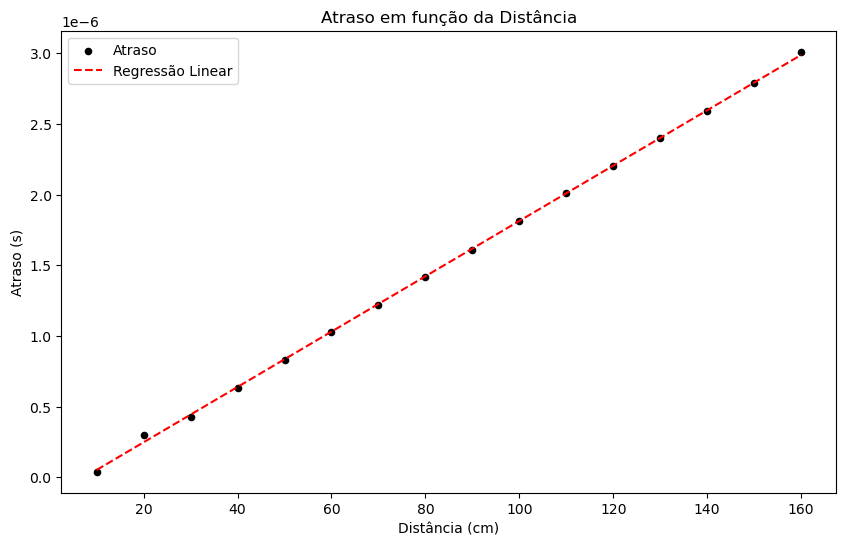

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Ler o ficheiro usando ponto e vírgula como delimitador
df = pd.read_csv('/Users/emanuelmiranda/Desktop/Exp9/Dados/Luz.csv', delimiter=';')  

# Constantes
fm = 60e6  # Frequência de modulação em Hz
fr = 59.9e6  # Frequência de referência em Hz
frequencia_diferenca = fm - fr  # Diferença de frequência em Hz
T_diferenca = 1 / frequencia_diferenca  # Período correspondente à diferença de frequência

# Valor real da velocidade da luz
c_real = 299702547  # m/s

# Conversão de atraso para segundos (caso esteja em nanosegundos no ficheiro)
df['Atraso'] = df['Atraso'] * 1e-9

# Calcular a velocidade da luz para cada par de dados
df['Velocidade_Luz'] = (fm * T_diferenca * df['Distância']*1e-2) / df['Atraso']

# Calcular a média das velocidades calculadas
velocidade_media = df['Velocidade_Luz'].mean()

# Calcular o erro absoluto e percentual
erro_absoluto = abs(c_real - velocidade_media)
erro_percentual = (erro_absoluto / c_real) * 100

# Exibir a velocidade média calculada e os erros
print(f"Velocidade média da luz calculada: {velocidade_media:.2e} m/s")
print(f"Erro absoluto: {erro_absoluto:.2e} m/s")
print(f"Erro percentual: {erro_percentual:.2f}%")

# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df['Distância'], df['Atraso'])

# Gerar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df['Distância'], df['Atraso'], marker='o', s=20, color='black', label='Atraso')
plt.plot(df['Distância'], slope * df['Distância'] + intercept, color='red',linestyle='--', label=f'Regressão Linear')
plt.xlabel('Distância (cm)')
plt.ylabel('Atraso (s)')
plt.title('Atraso em função da Distância')
plt.legend()
plt.show()

In [131]:
# Dados
L_acrilico = 0.05  # Comprimento do bloco de acrílico em metros
atraso_ar = 2.32e-6  # Atraso sem o acrílico em segundos
atraso_acrilico = 2.37e-6  # Atraso com o acrílico em segundos
fm = 60e6  # Frequência de modulação em Hz
delta_frequencia = frequencia_diferenca  # Diferença de frequência, já calculada anteriormente
T_diferenca = 1 / delta_frequencia  # Período correspondente à diferença de frequência
c0 = 3e8  # Velocidade média da luz calculada anteriormente

# Calcular o índice de refração do acrílico
n_acrilico = 1 + ((atraso_acrilico - atraso_ar) * c0) / (fm * T_diferenca * L_acrilico)

# Calcular a velocidade da luz no acrílico
c_acrilico = c0 / n_acrilico

# Exibir os resultados
print(f"Índice de refração do acrílico: {n_acrilico:.4f}")
print(f"Velocidade da luz no acrílico: {c_acrilico:.2e} m/s")


Índice de refração do acrílico: 1.5000
Velocidade da luz no acrílico: 2.00e+08 m/s


In [132]:
# Dados esperados
n_esperado = 1.495  # Valor esperado do índice de refração do acrílico
c_esperado = c0 / n_esperado  # Velocidade da luz esperada no acrílico

# Calcular o erro relativo em n
erro_n = abs(n_acrilico - n_esperado) / n_esperado * 100

# Calcular o erro relativo em c
erro_c = abs(c_acrilico - c_esperado) / c_esperado * 100

# Exibir os resultados
print(f"Índice de refração do acrílico (calculado): {n_acrilico:.4f}")
print(f"Velocidade da luz no acrílico (calculada): {c_acrilico:.2e} m/s")
print(f"Erro relativo no índice de refração: {erro_n:.2f}%")
print(f"Erro relativo na velocidade da luz: {erro_c:.2f}%")


Índice de refração do acrílico (calculado): 1.5000
Velocidade da luz no acrílico (calculada): 2.00e+08 m/s
Erro relativo no índice de refração: 0.33%
Erro relativo na velocidade da luz: 0.33%


In [8]:
import pandas as pd

# Ler o ficheiro csv com o separador correto
file_path = '/Users/emanuelmiranda/Desktop/Exp9/Dados/Luz.csv'
data = pd.read_csv(file_path, sep=';')

# Renomear as colunas, se necessário
data.columns = ["Distância", "Atraso", "Fase"]

# Converter distância de cm para m e atraso de ns para s
data["Distância"] = data["Distância"] * 0.01  # cm para m
data["Atraso"] = data["Atraso"] * 1e-9  # ns para s

# Salvar o novo ficheiro csv
output_file_path = '/Users/emanuelmiranda/Desktop/Exp9/Dados/luz_nova.csv'
data.to_csv(output_file_path, sep=';', index=False)

print(f"Ficheiro convertido salvo em: {output_file_path}")

Ficheiro convertido salvo em: /Users/emanuelmiranda/Desktop/Exp9/Dados/luz_nova.csv


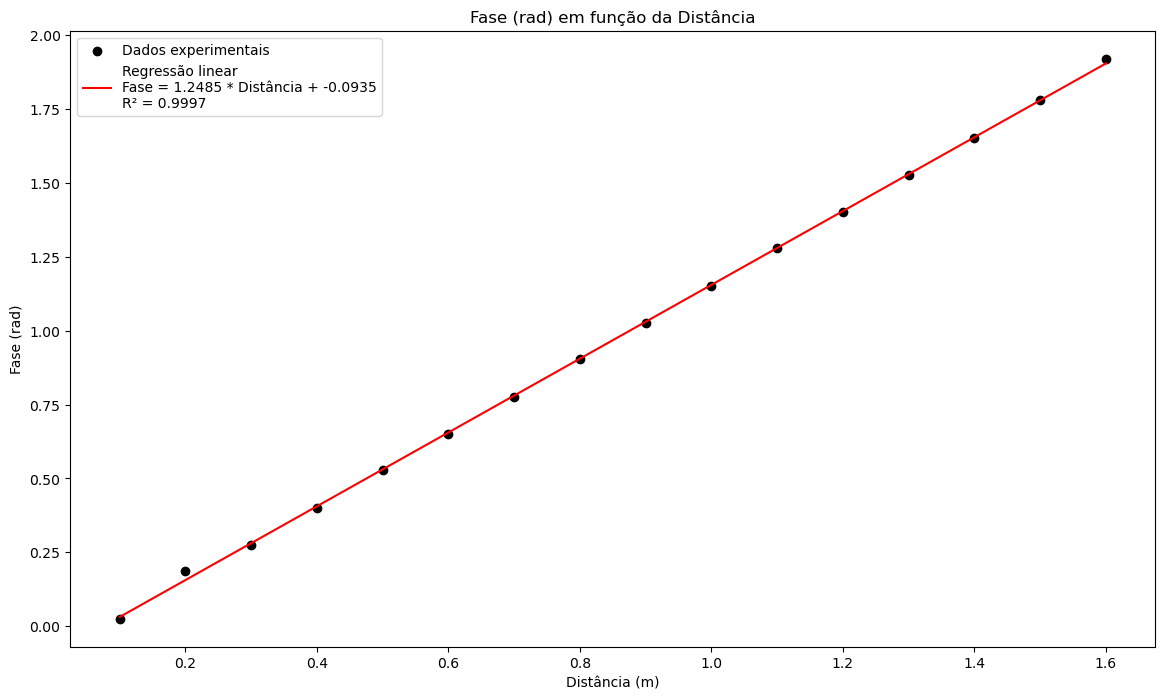

Coeficiente angular (slope): 1.2485
Incerteza do coeficiente angular: 5.6698e-03
Coeficiente linear (intercept): -0.0935
Coeficiente de correlação (r): 0.9999
Coeficiente de determinação (R²): 0.9997
Velocidade da Luz: 3.02e+08 m/s
Incerteza na Velocidade da Luz: 1.37e+06 m/s
Incerteza relativa: 0.45%
Erro relativo em relação à velocidade da luz real: 0.72%


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Ler o ficheiro csv com o separador correto
file_path = '/Users/emanuelmiranda/Desktop/Exp9/Dados/Luz_nova.csv'
data = pd.read_csv(file_path, sep=';')

# Renomear as colunas, se necessário
data.columns = ["Distância", "Atraso", "Fase"]

# Converter valores de "Distância", "Atraso" e "Fase" para ponto flutuante, corrigindo vírgulas
data["Fase"] = data["Fase"].str.replace(",", ".").astype(float)

# Converter a fase de graus para radianos
data["Fase (rad)"] = np.deg2rad(data["Fase"])

# Realizar a regressão linear entre distância e fase (em radianos)
x = data["Distância"]
y = data["Fase (rad)"]
regress = linregress(x, y)

# Extrair coeficientes da regressão linear
slope = regress.slope
intercept = regress.intercept
r_value = regress.rvalue
slope_error = regress.stderr  # Incerteza do coeficiente angular

# Gerar a linha de regressão
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = slope * x_fit + intercept

# Criar o gráfico
plt.figure(figsize=(14, 8))
plt.scatter(x, y, label="Dados experimentais", color="black")
plt.plot(x_fit, y_fit, label=f"Regressão linear\nFase = {slope:.4f} * Distância + {intercept:.4f}\nR² = {r_value**2:.4f}", color="red")
plt.xlabel("Distância (m)")
plt.ylabel("Fase (rad)")
plt.title("Fase (rad) em função da Distância")
plt.legend()
plt.grid(False)
plt.show()

# Calcular a velocidade da luz a partir da inclinação
frequency = 60_000_000  # 60 MHz
c = 2 * np.pi * frequency / slope

# Calcular a incerteza relativa e o erro percentual
c_uncertainty = abs(2 * np.pi * frequency / (slope**2) * slope_error)  # Propagação de incerteza
c_uncertainty_percent = (c_uncertainty / c) * 100  # Incerteza em percentagem
c_real = 299792458  # Velocidade da luz em m/s
c_relative_error = abs((c - c_real) / c_real) * 100  # Erro relativo em %

# Imprimir os coeficientes da regressão e resultados
print(f"Coeficiente angular (slope): {slope:.4f}")
print(f"Incerteza do coeficiente angular: {slope_error:.4e}")
print(f"Coeficiente linear (intercept): {intercept:.4f}")
print(f"Coeficiente de correlação (r): {r_value:.4f}")
print(f"Coeficiente de determinação (R²): {r_value**2:.4f}")

print(f"Velocidade da Luz: {c:.2e} m/s")
print(f"Incerteza na Velocidade da Luz: {c_uncertainty:.2e} m/s")
print(f"Incerteza relativa: {c_uncertainty_percent:.2f}%")
print(f"Erro relativo em relação à velocidade da luz real: {c_relative_error:.2f}%")